<a href="https://colab.research.google.com/github/M32Mantas/CNN_Image_Classification_Project/blob/main/%E2%80%9ECNN_Image_Classification_Project%E2%80%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Įdiegti reikalingas bibliotekas
!pip install tensorflow keras

# Importuoti bibliotekas
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


In [2]:
# Parsisiųsti CIFAR-10 duomenų rinkinį
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizuoti duomenis
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Atvaizduoti duomenų formą
print("Train data shape:", x_train.shape)
print("Train labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


170498071/170498071 [==============================] - 3s 0us/step
Train data shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [3]:
# Sukurti CNN modelį
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Atvaizduoti modelio architektūrą
model.summary()

# Kompiliuoti modelį
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [4]:
# Treniruoti modelį
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 80s 50ms/step - loss: 1.6826 - accuracy: 0.3771 - val_loss: 1.3053 - val_accuracy: 0.5253
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.3010 - accuracy: 0.5361 - val_loss: 1.1539 - val_accuracy: 0.5876
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1499 - accuracy: 0.5972 - val_loss: 1.0974 - val_accuracy: 0.6139
Epoch 4/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.0392 - accuracy: 0.6385 - val_loss: 1.0173 - val_accuracy: 0.6431
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9610 - accuracy: 0.6676 - val_loss: 0.9416 - val_accuracy: 0.6684
Epoch 6/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.9010 - accuracy: 0.6873 - val_loss: 0.9180 - val_accuracy: 0.6834
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8541 - accuracy: 0.7052 - val_loss: 0.8641 -

313/313 [==============================] - 9s 28ms/step - loss: 0.8806 - accuracy: 0.7035
Test accuracy: 0.703499972820282


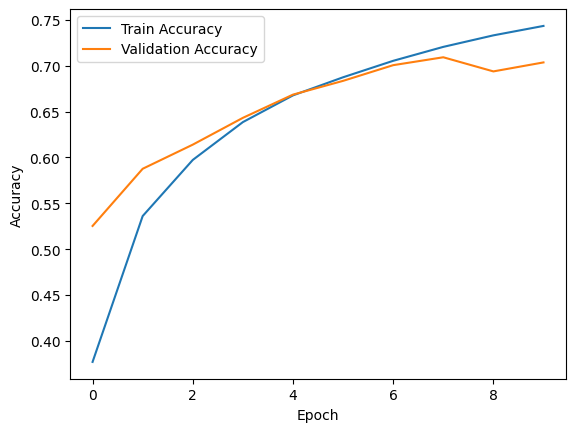

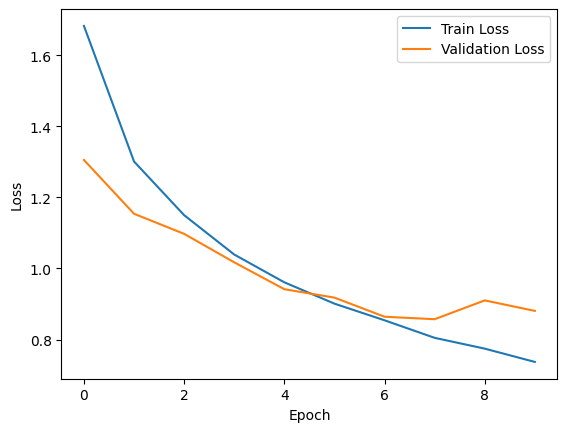

In [5]:
# Įvertinti modelį su testiniais duomenimis
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# Atvaizduoti treniravimo ir validacijos tikslumo grafiką
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Atvaizduoti treniravimo ir validacijos praradimo grafiką
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## CNN Modelio Treniruotė ir Vertinimas

### Modelio Treniruotės Rezultatai
Modelis buvo treniruotas naudojant CIFAR-10 duomenų rinkinį. Treniravimo metu mes stebėjome tikslumą ir praradimą tiek treniravimo, tiek validacijos duomenyse.

### Tikslumo Grafikas
Mėlyna linija rodo treniravimo duomenų tikslumą, o oranžinė linija rodo validacijos duomenų tikslumą. Matome, kad modelio tikslumas auga per epochas ir stabilizuojasi apie 70% validacijos duomenyse.

### Praradimo Grafikas
Mėlyna linija rodo treniravimo duomenų praradimą, o oranžinė linija rodo validacijos duomenų praradimą. Praradimas mažėja per epochas, rodo, kad modelis gerai mokosi ir nėra per daug pritaikomas (overfitting).

### Galutiniai Rezultatai
Modelio tikslumas su testiniais duomenimis yra 70.35%.

